<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/deep-learning-fundamentals/unit04-multilayer-networks/4_neural_networks_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unit 4.5: Multilayer Neural Networks for Regression

**Reference**:

[Multilayer Neural Networks for Regression](https://lightning.ai/pages/courses/deep-learning-fundamentals/training-multilayer-neural-networks-overview/4-5-multilayer-neural-networks-for-regression-parts-1-2/)

## Setup

In [10]:
import pandas as pd

import os
import time

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.utils.data import Dataset

import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [ ]:
def viz_batch_images(batch):
  plt.figure(figsize=(8, 8))
  plt.axis("off")
  plt.title("Training images")
  plt.imshow(
      np.transpose(
          vutils.make_grid(batch[0][:64], padding=2, normalize=True), (1, 2, 0)
      )
  )
  plt.show()

##1) Dataset

In [4]:
X_train = torch.tensor(
  [258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0]
).view(-1, 1)

y_train = torch.tensor(
  [236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8]
)

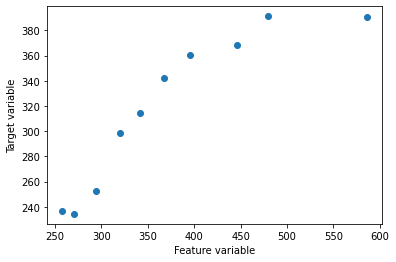

In [5]:
plt.scatter(X_train, y_train)
plt.xlabel("Feature variable")
plt.ylabel("Target variable")
plt.show()

##2) Multilayer Perceptron

In [6]:
class PyTorchMLP(torch.nn.Module):
  def __init__(self, num_features):
    super().__init__()

    self.all_layers = torch.nn.Sequential(
      # 1st hidden layer
      torch.nn.Linear(num_features, 50),
      torch.nn.ReLU(),
      # 2nd hidden layer
      torch.nn.Linear(50, 25),
      torch.nn.ReLU(),
      # output layer
      torch.nn.Linear(25, 1), ## Only 1 output unit
    )

  def forward(self, x):
    logits = self.all_layers(x).flatten()
    return logits

**Normalize data**

In [7]:
x_mean, x_std = X_train.mean(), X_train.std()
y_mean, y_std = y_train.mean(), y_train.std()

X_train_norm = (X_train - x_mean) / x_std
y_train_norm = (y_train - y_mean) / y_std

**Set up DataLoader**

In [8]:
class MyDataset(Dataset):
  def __init__(self, X, y):
    self.features = X
    self.targets = y

  def __getitem__(self, index):
    x = self.features[index]
    y = self.targets[index]
    return x, y

  def __len__(self):
    return self.targets.shape[0]


train_ds = MyDataset(X_train_norm, y_train_norm)

train_loader = DataLoader(
  dataset=train_ds,
  batch_size=20,
  shuffle=True,
)

##3) Train Model

In [11]:
torch.manual_seed(1)
model = PyTorchMLP(num_features=1)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

num_epochs = 30

loss_list = []
train_acc_list, val_acc_list = [], []

for epoch in range(num_epochs):
  model = model.train()
  for batch_idx, (features, targets) in enumerate(train_loader):
    logits = model(features)
    loss = F.mse_loss(logits, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### LOGGING
    if not batch_idx % 250:
      print(f"Epoch: {epoch+1:03d}/{num_epochs:03d} | Batch {batch_idx:03d}/{len(train_loader):03d} | Train Loss: {loss:.2f}")
    loss_list.append(loss.item())

Epoch: 001/030 | Batch 000/001 | Train Loss: 0.86
Epoch: 002/030 | Batch 000/001 | Train Loss: 0.63
Epoch: 003/030 | Batch 000/001 | Train Loss: 0.45
Epoch: 004/030 | Batch 000/001 | Train Loss: 0.29
Epoch: 005/030 | Batch 000/001 | Train Loss: 0.18
Epoch: 006/030 | Batch 000/001 | Train Loss: 0.11
Epoch: 007/030 | Batch 000/001 | Train Loss: 0.08
Epoch: 008/030 | Batch 000/001 | Train Loss: 0.07
Epoch: 009/030 | Batch 000/001 | Train Loss: 0.06
Epoch: 010/030 | Batch 000/001 | Train Loss: 0.05
Epoch: 011/030 | Batch 000/001 | Train Loss: 0.05
Epoch: 012/030 | Batch 000/001 | Train Loss: 0.04
Epoch: 013/030 | Batch 000/001 | Train Loss: 0.04
Epoch: 014/030 | Batch 000/001 | Train Loss: 0.04
Epoch: 015/030 | Batch 000/001 | Train Loss: 0.03
Epoch: 016/030 | Batch 000/001 | Train Loss: 0.03
Epoch: 017/030 | Batch 000/001 | Train Loss: 0.03
Epoch: 018/030 | Batch 000/001 | Train Loss: 0.02
Epoch: 019/030 | Batch 000/001 | Train Loss: 0.02
Epoch: 020/030 | Batch 000/001 | Train Loss: 0.02


##4) Test Model

In [12]:
model.eval()

X_range = torch.arange(150, 800, 0.1).view(-1, 1)
X_range_norm = (X_range - x_mean) / x_std

# predict
with torch.no_grad():
  y_mlp_norm = model(X_range_norm)

# MLP returns normalized predictions
# undo normalization of preditions for plotting
y_mlp = y_mlp_norm * y_std + y_mean

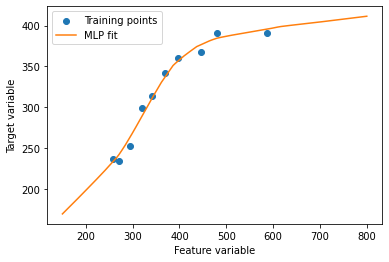

In [13]:
# plot results
plt.scatter(X_train, y_train, label="Training points")
plt.plot(X_range, y_mlp, color="C1", label="MLP fit", linestyle="-")


plt.xlabel("Feature variable")
plt.ylabel("Target variable")
plt.legend()
# plt.savefig("mlp.pdf")
plt.show()